In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

In [ ]:
#Load the data from Table 1 (REPORTED NUMBER OF TOTAL NEW TUBERCULOSIS CASES, 2019)
data = pd.read_csv("MLA_midterm.csv")

In [ ]:
data.head()

,Наименование региона,Пол,Всего,0-4,5-9,10-14,15-19,20-24,25-28,29-34,...,50-54,55-64,65-69,70-74,75-79,80-84,85+,14-28 вкл.,15-17 дети,сельские
0,Акмолинская,м,235,1,2,2,6,13,17,28,...,25,40,8,3,-,2,1,36,3,111.0
1,Акмолинская,ж,141,2,4,3,12,10,8,23,...,12,18,5,5,2,2,0,33,6,66.0
2,Актюбинская,м,242,4,1,5,11,24,18,37,...,21,36,7,3,2,0,0,55,7,75.0
3,Актюбинская,ж,193,2,3,9,24,22,31,32,...,3,13,9,2,2,1,1,82,14,39.0
4,Алматинская,м,517,3,3,6,24,37,39,73,...,48,75,18,10,7,7,2,102,10,367.0


In [ ]:
selected_columns = data[['15-19', '20-24', '25-28', '29-34']] #Selected 4 columns
target = data['Наименование региона']

In [ ]:
#PCA method
pca = PCA(n_components=1)
pca_data = pca.fit_transform(selected_columns)

In [ ]:
#DBCSAN clustering
dbscan = DBSCAN(eps=2, min_samples=1)
dbscan_clusters = dbscan.fit_predict(pca_data)

In [ ]:
#K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


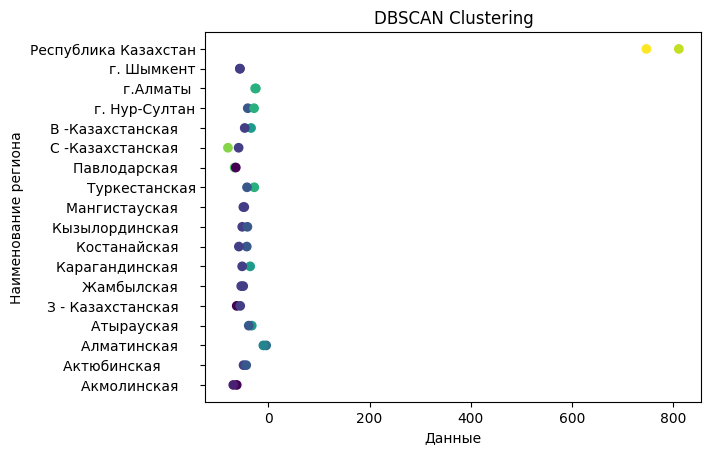

In [ ]:
#DBCSAN clustering visualization
plt.scatter(pca_data[:, 0], target, c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Данные')
plt.ylabel('Наименование региона')
plt.show()

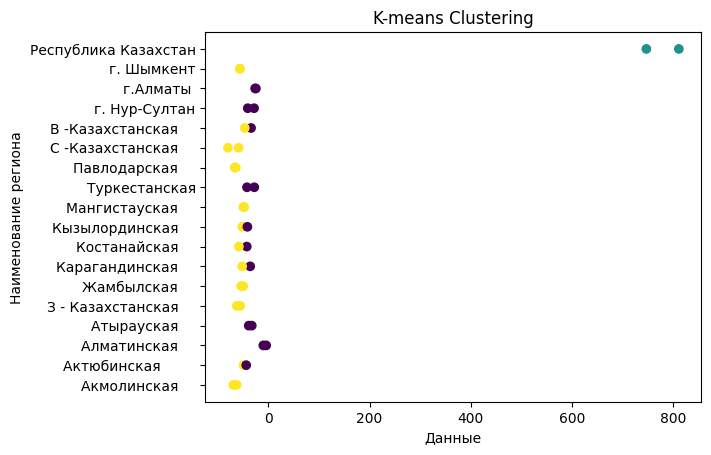

In [ ]:
#K-means clustering visualization
plt.scatter(pca_data[:, 0], target, c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Данные')
plt.ylabel('Наименование региона')
plt.show()